# Data Analysis

# Notebook set-up

In [471]:
import os 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import io
import statistics as stat
import statsmodels.api as sm
from statsmodels.api import OLS
import random
import statsmodels.formula.api as smf
import scipy as sp
import scipy.stats
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import scatter_matrix, radviz

sns.set_style('whitegrid')
sns.set_context('notebook')

# Data loading

In [472]:
# Load the data into a dataframe 
#can_master = pd.read_csv('can-1996-2016.csv')
#cmte_master =pd.read_csv('cm-1996-2014.csv') 
#opex=pd.read_csv('opex-2004-2014.csv')
#oth=pd.read_csv('oth-1996-2014.csv')
#exp=pd.read_csv('expresults_rev.csv')
#election_spend=pd.read_csv('catall.csv')
#results = pd.read_csv('candr.csv')
#catsort= pd.read_csv('catsort_rev.csv')
cost_vote = pd.read_csv('combined_all.csv')

In [473]:
cost_vote.head()

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,ge_winner_indicator,total_votes,totalspend,costpervote
0,H0AK00089,2010,550.00,0.00,0.00,0.00,0.0,785.00,0.00,0.0,...,0,DEM,38673.0,0.0,77606.0,0.0,0,116279.0,220001.06,1.892010
1,H0AK01038,2010,1569.23,88.93,0.00,0.00,0.0,0.00,0.00,0.0,...,0,REP,24709.0,0.0,0.0,0.0,0,24709.0,169777.74,6.871089
2,H0AL00016,2010,19831.34,909.80,81.19,465.00,0.0,3177.55,2192.99,0.0,...,0,DEM,6672.0,0.0,0.0,0.0,0,6672.0,26957.87,4.040448
3,H0AL01030,2010,7054.34,5233.32,668.95,27082.28,1175.0,1295.21,583.75,0.0,...,0,REP,18725.0,0.0,0.0,0.0,0,18725.0,44377.00,2.369933
4,H0AL01030,2012,3480.00,27.72,381.09,7257.71,0.0,0.00,56.58,0.0,...,0,R,3854.0,0.0,0.0,0.0,0,3854.0,11203.10,2.906876


In [474]:
cost_vote.dtypes

cand_id                      object
cycle                         int64
c1                          float64
c2                          float64
c3                          float64
c4                          float64
c5                          float64
c6                          float64
c7                          float64
c8                          float64
c9                          float64
c10                         float64
c11                         float64
c12                         float64
c13                         float64
state_abbreviation           object
district                     object
incumbent                    object
party                        object
primary_votes               float64
runoff_votes                float64
general_votes               float64
ge_runoff_election_votes    float64
ge_winner_indicator          object
total_votes                 float64
totalspend                  float64
costpervote                 float64
dtype: object

In [475]:
cost_vote['total_votes']=cost_vote['total_votes'].fillna(0)

In [476]:
cost_vote['totalspend']=cost_vote['totalspend'].fillna(0)

In [477]:
cost_vote['incumbent']=cost_vote['incumbent'].fillna(0)

In [478]:
cost_vote['party']=cost_vote['party'].fillna('None')

In [479]:
cost_vote = cost_vote.drop(['costpervote'], axis=1)

In [480]:
cost_vote['totalspend']=pd.to_numeric(cost_vote['totalspend'],errors='coerce')

In [481]:
print(cost_vote[pd.to_numeric(cost_vote['totalspend'], errors = 'coerce').isnull()])

Empty DataFrame
Columns: [cand_id, cycle, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, state_abbreviation, district, incumbent, party, primary_votes, runoff_votes, general_votes, ge_runoff_election_votes, ge_winner_indicator, total_votes, totalspend]
Index: []

[0 rows x 26 columns]


In [482]:
cost_vote['total_votes']=pd.to_numeric(cost_vote['total_votes'],errors='coerce')

In [483]:
print(cost_vote[pd.to_numeric(cost_vote['total_votes'], errors = 'coerce').isnull()])

Empty DataFrame
Columns: [cand_id, cycle, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, state_abbreviation, district, incumbent, party, primary_votes, runoff_votes, general_votes, ge_runoff_election_votes, ge_winner_indicator, total_votes, totalspend]
Index: []

[0 rows x 26 columns]


In [484]:
cost_vote['cycle']=pd.to_numeric(cost_vote['cycle'],errors='coerce')

In [485]:
print(cost_vote[pd.to_numeric(cost_vote['cycle'], errors = 'coerce').isnull()])

Empty DataFrame
Columns: [cand_id, cycle, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, state_abbreviation, district, incumbent, party, primary_votes, runoff_votes, general_votes, ge_runoff_election_votes, ge_winner_indicator, total_votes, totalspend]
Index: []

[0 rows x 26 columns]


In [486]:
cost_vote = cost_vote[cost_vote.total_votes != 0]

In [487]:
cost_vote.loc[cost_vote['totalspend'] == 0]

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,district,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,ge_winner_indicator,total_votes,totalspend
9107,H4TN09055,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,0,DEM,122.0,0.0,0.0,0.0,0,122.0,0.0
9853,H6VA10191,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,IND,0.0,0.0,1851.0,0.0,0,1851.0,0.0
10982,S4MD00160,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,S,0,REP,4110.0,0.0,0.0,0.0,0,4110.0,0.0
11505,H6LA02207,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,LBT,0.0,0.0,549.0,0.0,0,549.0,0.0
11506,H8NJ02133,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,RTB,0.0,0.0,1312.0,0.0,0,1312.0,0.0
11507,H0NJ02098,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,SUS,0.0,0.0,648.0,0.0,0,648.0,0.0
11508,H6RI01104,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,I,0.0,0.0,15108.0,0.0,0,15108.0,0.0
11509,H4AL02063,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,D,0.0,0.0,70562.0,0.0,0,70562.0,0.0
11510,H2AL05078,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,0,D,4393.0,0.0,0.0,0.0,0,4393.0,0.0
11511,H4AL05066,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,0,R,6742.0,2371.0,74145.0,0.0,0,83258.0,0.0


In [488]:
cost_vote = cost_vote.rename(columns = {'ge_winner_indicator':'winner'})

In [489]:
cost_vote['costvote'] = cost_vote['totalspend']/cost_vote['total_votes']

In [490]:
cost_vote.mean()

cycle                         2009.142466
c1                           82813.309249
c2                            2937.686044
c3                           24862.413532
c4                           77011.650229
c5                            4297.670139
c6                            7494.260491
c7                            2807.764581
c8                             115.423473
c9                              45.622999
c10                             83.920067
c11                            748.612873
c12                            287.573776
c13                         402798.463396
primary_votes                20683.139878
runoff_votes                   441.977017
general_votes                76868.068037
ge_runoff_election_votes       232.190030
total_votes                  98225.374962
totalspend                  606188.947376
costvote                      2662.593130
dtype: float64

In [491]:
cost_vote['cycle'] = cost_vote['cycle'].astype(int).astype('str')

In [492]:
cost_vote.describe()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,total_votes,totalspend,costvote
count,1.314000e+04,13140.000000,1.314000e+04,1.314000e+04,13140.000000,1.314000e+04,1.314000e+04,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,1.314000e+04,1.314000e+04,13140.000000,1.314000e+04,1.314000e+04,1.314000e+04,1.314000e+04,1.314000e+04
mean,8.281331e+04,2937.686044,2.486241e+04,7.701165e+04,4297.670139,7.494260e+03,2.807765e+03,115.423473,45.622999,83.920067,748.612873,287.573776,4.027985e+05,2.068314e+04,441.977017,7.686807e+04,2.321900e+02,9.822537e+04,6.061889e+05,2.662593e+03
std,4.662288e+05,13721.331612,1.365725e+05,5.160868e+05,19948.936705,4.880747e+04,2.082310e+04,5068.014913,875.780998,2216.931541,8543.058359,3322.745012,1.545528e+06,6.919007e+04,8472.866811,2.632518e+05,1.354564e+04,3.218754e+05,1.821591e+06,1.123215e+05
min,-7.637000e+02,-390.000000,-1.900000e-01,-7.500000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-5000.000000,0.000000,0.000000,-4.920380e+04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.663000e+03,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.125160e+03,5.676000e+03,0.000000,6.505000e+03,0.000000e+00,1.617900e+04,3.202793e+04,1.441572e+00
75%,1.417877e+04,68.235000,2.014810e+03,4.148600e+03,0.000000,3.873775e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.517188e+05,2.091725e+04,0.000000,1.013965e+05,0.000000e+00,1.238395e+05,5.978935e+05,7.717508e+00
max,2.545184e+07,527439.630000,8.283133e+06,2.546524e+07,777330.090000,2.290329e+06,1.000230e+06,500000.000000,43129.070000,164844.000000,407000.000000,117400.000000,3.943196e+07,2.566298e+06,631812.000000,7.864624e+06,1.228033e+06,1.025745e+07,4.955574e+07,7.044762e+06


In [493]:
cost_vote['party'] = cost_vote['party'].astype('str')

In [494]:
cost_vote = cost_vote.replace("DEM","D")

In [495]:
cost_vote = cost_vote.replace("REP","R")

In [496]:
cost_vote = cost_vote.replace("LBT","L")

In [497]:
cost_vote = cost_vote.replace("LIB","L")

In [498]:
major = !=["R","D","L"]

In [499]:
cost_vote = cost_vote.replace(major,"O")

In [500]:
cost_vote.head()

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,winner,total_votes,totalspend,costvote
0,H0AK00089,2010,550.00,0.00,0.00,0.00,0.0,785.00,0.00,0.0,...,0,D,38673.0,0.0,77606.0,0.0,0,116279.0,220001.06,1.892010
1,H0AK01038,2010,1569.23,88.93,0.00,0.00,0.0,0.00,0.00,0.0,...,0,R,24709.0,0.0,0.0,0.0,0,24709.0,169777.74,6.871089
2,H0AL00016,2010,19831.34,909.80,81.19,465.00,0.0,3177.55,2192.99,0.0,...,0,D,6672.0,0.0,0.0,0.0,0,6672.0,26957.87,4.040448
3,H0AL01030,2010,7054.34,5233.32,668.95,27082.28,1175.0,1295.21,583.75,0.0,...,0,R,18725.0,0.0,0.0,0.0,0,18725.0,44377.00,2.369933
4,H0AL01030,2012,3480.00,27.72,381.09,7257.71,0.0,0.00,56.58,0.0,...,0,R,3854.0,0.0,0.0,0.0,0,3854.0,11203.10,2.906876


In [501]:
cost_vote['party'].count()

13140

In [502]:
cost_vote['winner'].value_counts()

0             10355
1              2781
W (Runoff)        2
Dd                1
WW                1
Name: winner, dtype: int64

## Scores for Democrats (blue font unintentional) 

In [503]:
Gen = cost_vote[cost_vote.general_votes != 0]

In [504]:
Winner = Gen[Gen['winner'].isin(['1'])]

In [505]:
Loser = Gen[Gen['winner'].isin(['0'])]

In [506]:
Dem = Gen[Gen['party'].isin(['D'])]

In [507]:
Dem.head(100)

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,winner,total_votes,totalspend,costvote
0,H0AK00089,2010,550.00,0.00,0.00,0.00,0.00,785.00,0.00,0.0,...,0,D,38673.0,0.0,77606.0,0.0,0,116279.0,220001.06,1.892010
9,H0AL03184,2010,14.95,1441.91,0.00,5000.00,0.00,2293.50,0.00,0.0,...,0,D,0.0,0.0,80204.0,0.0,0,80204.0,8750.36,0.109101
19,H0AL07086,2010,717735.35,38988.03,52236.78,690997.05,55500.00,50828.50,31230.29,0.0,...,0,D,31531.0,32366.0,136696.0,0.0,1,200593.0,1673438.30,8.342456
20,H0AL07086,2012,329788.25,48925.15,65657.68,23994.00,0.00,40971.17,140490.99,0.0,...,1,D,0.0,0.0,232520.0,0.0,1,232520.0,661131.32,2.843331
21,H0AL07086,2014,425989.76,57266.94,116612.17,303683.52,30000.00,58571.83,166933.55,0.0,...,1,D,74953.0,0.0,133687.0,0.0,1,208640.0,1165162.70,5.584560
27,H0AR01109,2010,70562.30,5872.99,17720.93,303707.61,26000.00,6671.16,829.76,0.0,...,0,D,25854.0,39402.0,78267.0,0.0,0,143523.0,1562558.79,10.887166
47,H0AR03030,2010,31154.10,784.00,8468.11,4742.09,395.79,3535.65,217.35,0.0,...,0,D,0.0,0.0,56542.0,0.0,0,56542.0,74834.03,1.323512
60,H0AS00018,2004,1192.21,0.00,2021.58,8346.75,0.00,310.00,0.00,0.0,...,1,D,0.0,0.0,6656.0,0.0,1,6656.0,104193.08,15.654008
104,H0CA02138,2010,29435.14,2654.79,2552.37,46165.70,16750.00,8365.14,6036.95,0.0,...,0,D,42334.0,0.0,98092.0,0.0,0,140426.0,131000.68,0.932881
105,H0CA02138,2012,64561.45,7306.04,288.00,26013.00,2960.00,144.22,80.00,0.0,...,0,D,43409.0,0.0,125386.0,0.0,0,168795.0,177103.32,1.049221


In [508]:
DemW = Dem[Dem['winner'].isin(['1'])] #table of Democrats who won
DemW.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1267.0,1.199751e+05,3.508850e+05,0.00,0.000000,0.000000,1.168401e+05,7.071784e+06
c2,1267.0,6.036074e+03,1.999258e+04,0.00,0.000000,0.000000,2.665975e+03,2.893896e+05
c3,1267.0,4.683261e+04,1.871672e+05,0.00,0.000000,0.000000,4.140319e+04,5.594799e+06
c4,1267.0,1.444014e+05,9.467859e+05,-750.00,0.000000,0.000000,5.594320e+03,2.546524e+07
c5,1267.0,9.649582e+03,4.169237e+04,0.00,0.000000,0.000000,0.000000e+00,7.773301e+05
c6,1267.0,1.538446e+04,8.322974e+04,0.00,0.000000,0.000000,1.006340e+03,2.290329e+06
c7,1267.0,6.245743e+03,3.424702e+04,0.00,0.000000,0.000000,9.900000e+02,1.000230e+06
c8,1267.0,2.807535e+02,5.966891e+03,0.00,0.000000,0.000000,0.000000e+00,1.800000e+05
c9,1267.0,1.164275e+02,1.610966e+03,0.00,0.000000,0.000000,0.000000e+00,4.312907e+04
c10,1267.0,7.386825e+01,5.182740e+02,-400.00,0.000000,0.000000,0.000000e+00,9.300000e+03


In [509]:
DemWInc = DemW[DemW['incumbent'].isin(['1'])] #table of Democrat Incumbent who won
DemWInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1082.0,1.027144e+05,2.674979e+05,0.00,0.000000,0.000000,1.029508e+05,4.238332e+06
c2,1082.0,5.974485e+03,2.055652e+04,0.00,0.000000,0.000000,2.377308e+03,2.893896e+05
c3,1082.0,4.301155e+04,1.026644e+05,0.00,0.000000,0.000000,4.165430e+04,1.404384e+06
c4,1082.0,9.161149e+04,5.470340e+05,-750.00,0.000000,0.000000,3.792497e+03,9.983008e+06
c5,1082.0,6.393242e+03,2.851137e+04,0.00,0.000000,0.000000,0.000000e+00,5.923005e+05
c6,1082.0,8.534720e+03,3.586878e+04,0.00,0.000000,0.000000,4.486450e+02,5.160952e+05
c7,1082.0,6.306496e+03,3.639518e+04,0.00,0.000000,0.000000,3.500000e+02,1.000230e+06
c8,1082.0,2.352132e+02,5.683070e+03,0.00,0.000000,0.000000,0.000000e+00,1.800000e+05
c9,1082.0,1.101515e+02,1.599351e+03,0.00,0.000000,0.000000,0.000000e+00,4.312907e+04
c10,1082.0,5.944092e+01,4.648726e+02,-400.00,0.000000,0.000000,0.000000e+00,9.300000e+03


In [510]:
DemWC = DemW[DemW['incumbent'].isin(['0'])] #table of Democrat challengers who won
DemWC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,185.0,2.209269e+05,6.440000e+05,0.0,0.000000e+00,1.670529e+04,2.535038e+05,7.071784e+06
c2,185.0,6.396287e+03,1.635166e+04,0.0,0.000000e+00,0.000000e+00,6.115970e+03,1.713475e+05
c3,185.0,6.918062e+04,4.225187e+05,0.0,0.000000e+00,2.735900e+03,3.996882e+04,5.594799e+06
c4,185.0,4.531512e+05,2.073003e+06,0.0,0.000000e+00,0.000000e+00,2.035845e+05,2.546524e+07
c5,185.0,2.869477e+04,8.220168e+04,0.0,0.000000e+00,0.000000e+00,3.581110e+04,7.773301e+05
c6,185.0,5.544621e+04,1.954838e+05,0.0,0.000000e+00,0.000000e+00,3.039067e+04,2.290329e+06
c7,185.0,5.890416e+03,1.695737e+04,0.0,0.000000e+00,0.000000e+00,4.669500e+03,1.877644e+05
c8,185.0,5.471027e+02,7.425599e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+05
c9,185.0,1.531336e+02,1.681307e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.218561e+04
c10,185.0,1.582486e+02,7.550699e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.313270e+03


In [511]:
DemL = Dem[Dem['winner'].isin(['0'])] #table of Democrats who won
DemL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1327.0,74627.974295,2.653480e+05,0.0,0.000000,885.480000,37941.670000,4.360481e+06
c2,1327.0,3059.714936,1.270278e+04,-390.0,0.000000,0.000000,1611.315000,2.932756e+05
c3,1327.0,14895.315418,5.258994e+04,0.0,0.000000,0.000000,6039.150000,7.080864e+05
c4,1327.0,95057.723595,3.959304e+05,-324.0,0.000000,0.000000,17048.250000,8.772151e+06
c5,1327.0,6155.928184,1.985510e+04,0.0,0.000000,0.000000,0.000000,2.048548e+05
c6,1327.0,11311.573738,5.881164e+04,0.0,0.000000,0.000000,5520.820000,1.534658e+06
c7,1327.0,1958.495961,9.088393e+03,0.0,0.000000,0.000000,673.625000,1.525661e+05
c8,1327.0,20.481959,3.992992e+02,0.0,0.000000,0.000000,0.000000,1.137500e+04
c9,1327.0,27.953851,2.709405e+02,0.0,0.000000,0.000000,0.000000,5.626030e+03
c10,1327.0,99.073534,1.468812e+03,0.0,0.000000,0.000000,0.000000,4.983207e+04


In [512]:
DemLInc = DemL[DemL['incumbent'].isin(['1'])] #table of Democrat Incumbent who lose
DemLInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,134.0,2.007616e+05,5.297954e+05,0.0,0.000000,0.000000e+00,1.622017e+05,4.104223e+06
c2,134.0,7.777744e+03,2.476687e+04,-390.0,0.000000,0.000000e+00,7.730797e+03,2.564344e+05
c3,134.0,5.197178e+04,1.122384e+05,0.0,0.000000,0.000000e+00,5.594996e+04,6.066072e+05
c4,134.0,2.737383e+05,9.412709e+05,0.0,0.000000,0.000000e+00,5.718943e+03,8.772151e+06
c5,134.0,1.493568e+04,3.702865e+04,0.0,0.000000,0.000000e+00,0.000000e+00,2.048548e+05
c6,134.0,1.590541e+04,5.779092e+04,0.0,0.000000,0.000000e+00,3.140160e+03,5.585654e+05
c7,134.0,5.183430e+03,1.859039e+04,0.0,0.000000,0.000000e+00,1.005745e+03,1.493258e+05
c8,134.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
c9,134.0,2.985022e+01,2.413234e+02,0.0,0.000000,0.000000e+00,0.000000e+00,2.000000e+03
c10,134.0,5.183029e+02,4.356871e+03,0.0,0.000000,0.000000e+00,0.000000e+00,4.983207e+04


In [513]:
DemLC = DemL[DemL['incumbent'].isin(['0'])] #table of Democrat Incumbent who lose
DemLC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1193.0,60460.410017,2.121733e+05,0.0,0.000000,1172.170000,35016.330000,4.360481e+06
c2,1193.0,2529.777091,1.040555e+04,0.0,0.000000,0.000000,1498.850000,2.932756e+05
c3,1193.0,10730.817477,3.871861e+04,0.0,0.000000,0.000000,4796.660000,7.080864e+05
c4,1193.0,74987.981098,2.674599e+05,-324.0,0.000000,0.000000,18038.170000,4.025618e+06
c5,1193.0,5169.770319,1.661077e+04,0.0,0.000000,0.000000,0.000000,1.923870e+05
c6,1193.0,10795.585809,5.892666e+04,0.0,0.000000,0.000000,5691.910000,1.534658e+06
c7,1193.0,1596.265272,7.212662e+03,0.0,0.000000,0.000000,641.910000,1.525661e+05
c8,1193.0,22.782531,4.210831e+02,0.0,0.000000,0.000000,0.000000,1.137500e+04
c9,1193.0,27.740847,2.741582e+02,0.0,0.000000,0.000000,0.000000,5.626030e+03
c10,1193.0,51.984904,5.098685e+02,0.0,0.000000,0.000000,0.000000,1.140000e+04


In [514]:
Rep = Gen[Gen['party'].isin(['R'])]

In [515]:
Rep.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,2579.0,2.072966e+05,8.460947e+05,-0.29,0.000000,5590.320000,1.601081e+05,2.545184e+07
c2,2579.0,6.304956e+03,1.994414e+04,0.00,0.000000,0.000000,2.978155e+03,5.274396e+05
c3,2579.0,6.604212e+04,2.410546e+05,0.00,0.000000,298.250000,4.423546e+04,8.283133e+06
c4,2579.0,1.396537e+05,5.996801e+05,0.00,0.000000,0.000000,4.327663e+04,1.811699e+07
c5,2579.0,7.637804e+03,2.223311e+04,0.00,0.000000,0.000000,2.225000e+02,3.169784e+05
c6,2579.0,1.084493e+04,5.548636e+04,0.00,0.000000,0.000000,2.960750e+03,1.872233e+06
c7,2579.0,5.973010e+03,2.679677e+04,0.00,0.000000,0.000000,2.000000e+03,8.582995e+05
c8,2579.0,4.126891e+02,1.062226e+04,0.00,0.000000,0.000000,0.000000e+00,5.000000e+05
c9,2579.0,5.368474e+01,1.020658e+03,0.00,0.000000,0.000000,0.000000e+00,3.620453e+04
c10,2579.0,1.314378e+02,3.583009e+03,-5000.00,0.000000,0.000000,0.000000e+00,1.648440e+05


In [516]:
RepW = Rep[Rep['winner'].isin(['1'])]
RepW.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1326.0,2.577024e+05,5.937132e+05,0.00,0.000000,23237.710000,3.063876e+05,8.853032e+06
c2,1326.0,8.815329e+03,2.433561e+04,0.00,0.000000,0.000000,7.877342e+03,5.274396e+05
c3,1326.0,8.879124e+04,2.018838e+05,0.00,0.000000,5158.070000,1.081441e+05,3.066642e+06
c4,1326.0,1.500616e+05,4.929795e+05,0.00,0.000000,0.000000,8.852273e+04,1.223820e+07
c5,1326.0,9.903480e+03,2.497333e+04,0.00,0.000000,0.000000,6.900000e+03,3.169784e+05
c6,1326.0,9.848562e+03,3.401812e+04,0.00,0.000000,0.000000,2.182648e+03,4.990009e+05
c7,1326.0,7.526809e+03,2.159333e+04,0.00,0.000000,0.000000,3.860815e+03,3.121001e+05
c8,1326.0,6.898546e+02,1.443028e+04,0.00,0.000000,0.000000,0.000000e+00,5.000000e+05
c9,1326.0,8.358416e+01,1.376192e+03,0.00,0.000000,0.000000,0.000000e+00,3.620453e+04
c10,1326.0,2.375463e+02,4.987876e+03,0.00,0.000000,0.000000,0.000000e+00,1.648440e+05


In [517]:
RepWInc = RepW[RepW['incumbent'].isin(['1'])]
RepWInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1093.0,2.398409e+05,5.518194e+05,0.00,0.000000,13000.870000,2.809910e+05,8.853032e+06
c2,1093.0,8.214321e+03,2.020866e+04,0.00,0.000000,0.000000,7.097140e+03,1.804328e+05
c3,1093.0,8.835692e+04,1.975340e+05,0.00,0.000000,4055.500000,1.110198e+05,3.066642e+06
c4,1093.0,1.033081e+05,2.837885e+05,0.00,0.000000,0.000000,5.020331e+04,2.836189e+06
c5,1093.0,8.611447e+03,2.254651e+04,0.00,0.000000,0.000000,1.821990e+03,3.169784e+05
c6,1093.0,8.593977e+03,3.286661e+04,0.00,0.000000,0.000000,1.551450e+03,4.990009e+05
c7,1093.0,7.530983e+03,2.219011e+04,0.00,0.000000,0.000000,3.677850e+03,3.121001e+05
c8,1093.0,8.038643e+02,1.587516e+04,0.00,0.000000,0.000000,0.000000e+00,5.000000e+05
c9,1093.0,8.265757e+01,1.461936e+03,0.00,0.000000,0.000000,0.000000e+00,3.620453e+04
c10,1093.0,2.186181e+02,5.076361e+03,0.00,0.000000,0.000000,0.000000e+00,1.648440e+05


In [518]:
RepWC = Rep[Rep['incumbent'].isin(['0'])]
RepWC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1388.0,175310.494265,1.034101e+06,-0.29,0.000000,3331.000000,7.522167e+04,2.545184e+07
c2,1388.0,4298.117774,1.800384e+04,0.00,0.000000,0.000000,1.499310e+03,5.274396e+05
c3,1388.0,38860.785101,1.580284e+05,0.00,0.000000,0.000000,1.305766e+04,3.518841e+06
c4,1388.0,148195.179769,7.242292e+05,0.00,0.000000,0.000000,3.697907e+04,1.811699e+07
c5,1388.0,6135.219733,1.950180e+04,0.00,0.000000,0.000000,0.000000e+00,2.734362e+05
c6,1388.0,12063.845187,6.716189e+04,0.00,0.000000,0.000000,4.421440e+03,1.872233e+06
c7,1388.0,4282.806744,2.707683e+04,0.00,0.000000,0.000000,1.287438e+03,8.582995e+05
c8,1388.0,31.969726,7.030291e+02,0.00,0.000000,0.000000,0.000000e+00,2.279056e+04
c9,1388.0,34.660101,5.023567e+02,0.00,0.000000,0.000000,0.000000e+00,1.168465e+04
c10,1388.0,67.340367,1.883028e+03,-5000.00,0.000000,0.000000,0.000000e+00,6.953224e+04


In [519]:
RepL = Rep[Rep['winner'].isin(['0'])]
RepL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1250.0,153246.067240,1.047505e+06,-0.29,0.000000,2163.935000,49467.530000,2.545184e+07
c2,1250.0,3612.894088,1.332654e+04,0.00,0.000000,0.000000,1050.845000,2.365198e+05
c3,1250.0,41690.754696,2.746369e+05,0.00,0.000000,0.000000,9302.522500,8.283133e+06
c4,1250.0,126270.019472,6.914690e+05,0.00,0.000000,0.000000,28787.982500,1.811699e+07
c5,1250.0,5083.717824,1.784564e+04,0.00,0.000000,0.000000,0.000000,2.207500e+05
c6,1250.0,11862.138128,7.156846e+04,0.00,0.000000,0.000000,3948.235000,1.872233e+06
c7,1250.0,4297.205752,3.132184e+04,0.00,0.000000,0.000000,859.750000,8.582995e+05
c8,1250.0,119.662464,3.438098e+03,0.00,0.000000,0.000000,0.000000,1.202947e+05
c9,1250.0,22.096272,3.729753e+02,0.00,0.000000,0.000000,0.000000,1.150000e+04
c10,1250.0,19.193424,2.843237e+02,-5000.00,0.000000,0.000000,0.000000,5.000000e+03


In [520]:
RepLInc = RepL[RepL['incumbent'].isin(['1'])]
RepLInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,96.0,2.783346e+05,5.101413e+05,0.0,0.000000e+00,2.352942e+04,3.298094e+05,2.302124e+06
c2,96.0,1.293684e+04,3.465435e+04,0.0,0.000000e+00,0.000000e+00,1.155245e+04,2.365198e+05
c3,96.0,1.997231e+05,8.528603e+05,0.0,0.000000e+00,8.647240e+03,1.974637e+05,8.283133e+06
c4,96.0,3.690383e+05,9.617031e+05,0.0,0.000000e+00,0.000000e+00,1.353513e+05,7.191944e+06
c5,96.0,1.438836e+04,3.456190e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.207500e+05
c6,96.0,1.820664e+04,7.143082e+04,0.0,0.000000e+00,0.000000e+00,8.115100e+02,5.913480e+05
c7,96.0,1.170751e+04,5.451083e+04,0.0,0.000000e+00,0.000000e+00,3.531590e+03,5.009458e+05
c8,96.0,1.472162e+03,1.236015e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.202947e+05
c9,96.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
c10,96.0,6.833542e+01,4.981880e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+03


In [521]:
RepLC = RepL[RepL['incumbent'].isin(['0'])]
RepLC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1153.0,141877.161240,1.079682e+06,-0.29,0.000000,1689.540000,41575.360000,2.545184e+07
c2,1153.0,2813.710364,9.221109e+03,0.00,0.000000,0.000000,866.960000,1.177486e+05
c3,1153.0,28417.237580,1.397162e+05,0.00,0.000000,0.000000,7861.050000,3.518841e+06
c4,1153.0,103328.784458,6.542873e+05,0.00,0.000000,0.000000,26138.810000,1.811699e+07
c5,1153.0,4145.517988,1.441653e+04,0.00,0.000000,0.000000,0.000000,1.651940e+05
c6,1153.0,11332.446886,7.161650e+04,0.00,0.000000,0.000000,4027.840000,1.872233e+06
c7,1153.0,3629.130772,2.847086e+04,0.00,0.000000,0.000000,781.120000,8.582995e+05
c8,1153.0,7.155690,2.284881e+02,0.00,0.000000,0.000000,0.000000,7.753680e+03
c9,1153.0,23.955195,3.883031e+02,0.00,0.000000,0.000000,0.000000,1.150000e+04
c10,1153.0,15.118456,2.587691e+02,-5000.00,0.000000,0.000000,0.000000,5.000000e+03


In [522]:
Lib = cost_vote[cost_vote['party'].isin(['L'])]

In [523]:
Lib.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,889.0,879.089359,14044.488988,0.0,0.0,0.0,0.0,2.958971e+05
c2,889.0,92.602092,1505.483201,0.0,0.0,0.0,0.0,3.177802e+04
c3,889.0,775.674196,20495.719610,0.0,0.0,0.0,0.0,6.101976e+05
c4,889.0,1694.625411,36426.028055,0.0,0.0,0.0,0.0,1.077713e+06
c5,889.0,48.653543,1134.645189,0.0,0.0,0.0,0.0,3.310000e+04
c6,889.0,117.286299,1166.336665,0.0,0.0,0.0,0.0,3.050309e+04
c7,889.0,46.575917,564.495003,0.0,0.0,0.0,0.0,1.083557e+04
c8,889.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
c9,889.0,0.433780,12.933615,0.0,0.0,0.0,0.0,3.856300e+02
c10,889.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00


In [524]:
LibW = Lib[Lib['winner'].isin(['1'])]
LibW.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [525]:
LibL = Lib[Lib['winner'].isin(['0'])]
LibL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,889.0,879.089359,14044.488988,0.0,0.0,0.0,0.0,2.958971e+05
c2,889.0,92.602092,1505.483201,0.0,0.0,0.0,0.0,3.177802e+04
c3,889.0,775.674196,20495.719610,0.0,0.0,0.0,0.0,6.101976e+05
c4,889.0,1694.625411,36426.028055,0.0,0.0,0.0,0.0,1.077713e+06
c5,889.0,48.653543,1134.645189,0.0,0.0,0.0,0.0,3.310000e+04
c6,889.0,117.286299,1166.336665,0.0,0.0,0.0,0.0,3.050309e+04
c7,889.0,46.575917,564.495003,0.0,0.0,0.0,0.0,1.083557e+04
c8,889.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
c9,889.0,0.433780,12.933615,0.0,0.0,0.0,0.0,3.856300e+02
c10,889.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00


In [526]:
LibLInc = LibL[LibL['incumbent'].isin(['1'])]
LibLInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [527]:
LibLC = LibL[LibL['incumbent'].isin(['0'])]
LibLC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,889.0,879.089359,14044.488988,0.0,0.0,0.0,0.0,2.958971e+05
c2,889.0,92.602092,1505.483201,0.0,0.0,0.0,0.0,3.177802e+04
c3,889.0,775.674196,20495.719610,0.0,0.0,0.0,0.0,6.101976e+05
c4,889.0,1694.625411,36426.028055,0.0,0.0,0.0,0.0,1.077713e+06
c5,889.0,48.653543,1134.645189,0.0,0.0,0.0,0.0,3.310000e+04
c6,889.0,117.286299,1166.336665,0.0,0.0,0.0,0.0,3.050309e+04
c7,889.0,46.575917,564.495003,0.0,0.0,0.0,0.0,1.083557e+04
c8,889.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
c9,889.0,0.433780,12.933615,0.0,0.0,0.0,0.0,3.856300e+02
c10,889.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00


In [528]:
cost_vote.head()

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,winner,total_votes,totalspend,costvote
0,H0AK00089,2010,550.00,0.00,0.00,0.00,0.0,785.00,0.00,0.0,...,0,D,38673.0,0.0,77606.0,0.0,0,116279.0,220001.06,1.892010
1,H0AK01038,2010,1569.23,88.93,0.00,0.00,0.0,0.00,0.00,0.0,...,0,R,24709.0,0.0,0.0,0.0,0,24709.0,169777.74,6.871089
2,H0AL00016,2010,19831.34,909.80,81.19,465.00,0.0,3177.55,2192.99,0.0,...,0,D,6672.0,0.0,0.0,0.0,0,6672.0,26957.87,4.040448
3,H0AL01030,2010,7054.34,5233.32,668.95,27082.28,1175.0,1295.21,583.75,0.0,...,0,R,18725.0,0.0,0.0,0.0,0,18725.0,44377.00,2.369933
4,H0AL01030,2012,3480.00,27.72,381.09,7257.71,0.0,0.00,56.58,0.0,...,0,R,3854.0,0.0,0.0,0.0,0,3854.0,11203.10,2.906876


In [529]:
DemW['total_votes'].sum()

364956599.0

In [530]:
formula = 'total_votes ~ totalspend'
model = smf.ols(formula, data=Winner)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_votes   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     972.4
Date:                Wed, 06 Sep 2017   Prob (F-statistic):          3.45e-183
Time:                        01:39:58   Log-Likelihood:                -39982.
No. Observations:                2767   AIC:                         7.997e+04
Df Residuals:                    2765   BIC:                         7.998e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9.974e+04   1.02e+04      9.759      0.000      7.97e+04   1.2e+05
totalspend     0.1127      0.004     31.183      0.000         0.106     0.120
==============================================================================
Omnibus:                     4509.479   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3467676.867
Skew:                          10.535   Prob(JB):                         0.00
Kurtosis:                     175.144   Cond. No.                     3.33e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [531]:
formula = 'total_votes ~ totalspend'
model = smf.ols(formula, data=Loser)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_votes   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     1057.
Date:                Wed, 06 Sep 2017   Prob (F-statistic):          5.74e-212
Time:                        01:39:58   Log-Likelihood:                -75703.
No. Observations:                5442   AIC:                         1.514e+05
Df Residuals:                    5440   BIC:                         1.514e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5.626e+04   3740.194     15.041      0.000      4.89e+04  6.36e+04
totalspend     0.0608      0.002     32.505      0.000         0.057     0.064
==============================================================================
Omnibus:                     9089.041   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7899346.032
Skew:                          11.242   Prob(JB):                         0.00
Kurtosis:                     188.288   Cond. No.                     2.07e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [532]:
formula = 'total_votes ~ c1+c2+c3+c4+c5+c6+c7+c8+c9+c10+c11+c12+c13'
model = smf.ols(formula, data=DemW)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_votes   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     43.94
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           9.19e-93
Time:                        01:39:58   Log-Likelihood:                -18510.
No. Observations:                1267   AIC:                         3.705e+04
Df Residuals:                    1253   BIC:                         3.712e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   8.691e+04   1.87e+04      4.659      0.000      5.03e+04  1.23e+05
c1            -0.0680      0.098     -0.694      0.488        -0.260     0.124
c2             2.8616      0.935      3.061      0.002         1.027     4.696
c3             0.6448      0.164      3.938      0.000         0.324     0.966
c4             0.0285      0.036      0.794      0.427        -0.042     0.099
c5             1.3531      0.535      2.529      0.012         0.303     2.403
c6            -0.4772      0.198     -2.410      0.016        -0.866    -0.089
c7            -0.5037      0.493     -1.022      0.307        -1.470     0.463
c8            -1.0457      2.568     -0.407      0.684        -6.083     3.992
c9            -2.2498      9.513     -0.236      0.813       -20.913    16.413
c10           31.3186     31.385      0.998      0.319       -30.255    92.892
c11           -0.2196      1.178     -0.186      0.852        -2.530     2.091
c12            0.2195      2.720      0.081      0.936        -5.116     5.555
c13            0.1341      0.007     20.500      0.000         0.121     0.147
==============================================================================
Omnibus:                     2095.660   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1338038.648
Skew:                          10.550   Prob(JB):                         0.00
Kurtosis:                     160.799   Cond. No.                     3.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [533]:
sns.regplot(x='totalspend', y='total_votes', data=DemW)

In [534]:
sns.regplot('totalspend', 'total_votes', DemW)

In [535]:
DemW.plot(x='totalspend', y='total_votes')

In [536]:
sns.lmplot('totalspend','total_votes',DemW)

In [537]:
formula = 'total_votes ~ c1+c2+c3+c4+c5+c6+c7+c8+c9+c12+c13'
model = smf.ols(formula, data=Loser)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_votes   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     116.2
Date:                Wed, 06 Sep 2017   Prob (F-statistic):          1.62e-239
Time:                        01:39:59   Log-Likelihood:                -75611.
No. Observations:                5442   AIC:                         1.512e+05
Df Residuals:                    5430   BIC:                         1.513e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5.527e+04   3756.565     14.712      0.000      4.79e+04  6.26e+04
c1             0.0664      0.007      9.097      0.000         0.052     0.081
c2             2.9374      0.401      7.319      0.000         2.151     3.724
c3             0.0214      0.028      0.758      0.448        -0.034     0.077
c4            -0.0242      0.011     -2.157      0.031        -0.046    -0.002
c5            -0.1848      0.309     -0.598      0.550        -0.791     0.421
c6             0.0817      0.081      1.004      0.316        -0.078     0.241
c7            -0.3188      0.210     -1.518      0.129        -0.730     0.093
c8             1.6572      2.150      0.771      0.441        -2.558     5.872
c9             3.5293     15.258      0.231      0.817       -26.382    33.441
c12           -2.3755      1.360     -1.747      0.081        -5.041     0.290
c13            0.0723      0.002     31.257      0.000         0.068     0.077
==============================================================================
Omnibus:                     9145.433   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8355313.119
Skew:                          11.371   Prob(JB):                         0.00
Kurtosis:                     193.607   Cond. No.                     1.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Simple Regression for Winners and Losers

In [538]:
Total_VoteW = Winner['total_votes']
Total_SpendW = Winner['totalspend']

def reg_m(Total_VoteW,Total_SpendW):
    Total_SpendW=np.array(Total_SpendW).T
    Total_SpendW=sm.add_constant(Total_SpendW)
    model=sm.OLS(endog=Total_VoteW,exog=Total_SpendW)
    results=model.fit()
    return results

print (reg_m(Total_VoteW,Total_SpendW).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     972.4
Date:                Wed, 06 Sep 2017   Prob (F-statistic):          3.45e-183
Time:                        01:39:59   Log-Likelihood:                -39982.
No. Observations:                2767   AIC:                         7.997e+04
Df Residuals:                    2765   BIC:                         7.998e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9.974e+04   1.02e+04      9.759      0.0

In [539]:
Total_VoteL = Loser['total_votes']
Total_SpendL = Loser['totalspend']

def reg_m(Total_VoteL,Total_SpendL):
    Total_SpendL=np.array(Total_SpendL).T
    Total_SpendL=sm.add_constant(Total_SpendL)
    model=sm.OLS(endog=Total_VoteL,exog=Total_SpendL)
    results=model.fit()
    return results

print (reg_m(Total_VoteL,Total_SpendL).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     1057.
Date:                Wed, 06 Sep 2017   Prob (F-statistic):          5.74e-212
Time:                        01:39:59   Log-Likelihood:                -75703.
No. Observations:                5442   AIC:                         1.514e+05
Df Residuals:                    5440   BIC:                         1.514e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.626e+04   3740.194     15.041      0.0

Simple Regression for Democrats and Republicans who won the General Election

In [540]:
Total_VoteDW = DemW['total_votes']
Total_SpendDW = DemW['totalspend']

def reg_m(Total_VoteDW,Total_SpendDW):
    Total_SpendDW=np.array(Total_SpendDW).T
    Total_SpendDW=sm.add_constant(Total_SpendDW)
    model=sm.OLS(endog=Total_VoteDW,exog=Total_SpendDW)
    results=model.fit()
    return results

print (reg_m(Total_VoteDW,Total_SpendDW).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     525.7
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           1.39e-97
Time:                        01:39:59   Log-Likelihood:                -18528.
No. Observations:                1267   AIC:                         3.706e+04
Df Residuals:                    1265   BIC:                         3.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9.579e+04   1.74e+04      5.502      0.0

In [541]:
Total_VoteDWInc = DemWInc['total_votes']
Total_SpendDWInc = DemWInc['totalspend']

def reg_m(Total_VoteDWInc,Total_SpendDWInc):
    Total_SpendDWInc=np.array(Total_SpendDWInc).T
    Total_SpendDWInc=sm.add_constant(Total_SpendDWInc)
    model=sm.OLS(endog=Total_VoteDWInc,exog=Total_SpendDWInc)
    results=model.fit()
    return results

print (reg_m(Total_VoteDWInc,Total_SpendDWInc).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     515.6
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           1.27e-93
Time:                        01:39:59   Log-Likelihood:                -15821.
No. Observations:                1082   AIC:                         3.165e+04
Df Residuals:                    1080   BIC:                         3.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       8.085e+04   1.87e+04      4.313      0.0

In [542]:
Total_VoteDWC = DemWC['total_votes']
Total_SpendDWC = DemWC['totalspend']

def reg_m(Total_VoteDWC,Total_SpendDWC):
    Total_SpendDWC=np.array(Total_SpendDWC).T
    Total_SpendDWC=sm.add_constant(Total_SpendDWC)
    model=sm.OLS(endog=Total_VoteDWC,exog=Total_SpendDWC)
    results=model.fit()
    return results

print (reg_m(Total_VoteDWC,Total_SpendDWC).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     94.59
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           2.77e-18
Time:                        01:39:59   Log-Likelihood:                -2673.5
No. Observations:                 185   AIC:                             5351.
Df Residuals:                     183   BIC:                             5357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       8.767e+04   4.11e+04      2.134      0.0

In [543]:
Gen.to_csv('General.csv', index=False)

In [544]:
Total_VoteRW = RepW['total_votes']
Total_SpendRW = RepW['totalspend']

def reg_m(Total_VoteRW,Total_SpendRW):
    Total_SpendRW=np.array(Total_SpendRW).T
    Total_SpendRW=sm.add_constant(Total_SpendRW)
    model=sm.OLS(endog=Total_VoteRW,exog=Total_SpendRW)
    results=model.fit()
    return results

print (reg_m(Total_VoteRW,Total_SpendRW).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     353.1
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           5.08e-70
Time:                        01:39:59   Log-Likelihood:                -18752.
No. Observations:                1326   AIC:                         3.751e+04
Df Residuals:                    1324   BIC:                         3.752e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.235e+05   1.14e+04     10.858      0.0

In [545]:
Total_VoteRWInc = RepWInc['total_votes']
Total_SpendRWInc = RepWInc['totalspend']

def reg_m(Total_VoteRWInc,Total_SpendRWInc):
    Total_SpendRWInc=np.array(Total_SpendRWInc).T
    Total_SpendRWInc=sm.add_constant(Total_SpendRWInc)
    model=sm.OLS(endog=Total_VoteRWInc,exog=Total_SpendRWInc)
    results=model.fit()
    return results

print (reg_m(Total_VoteRWInc,Total_SpendRWInc).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     87.20
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           5.33e-20
Time:                        01:39:59   Log-Likelihood:                -15331.
No. Observations:                1093   AIC:                         3.067e+04
Df Residuals:                    1091   BIC:                         3.068e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.741e+05   1.13e+04     15.403      0.0

In [546]:
Total_VoteRWC = RepWC['total_votes']
Total_SpendRWC = RepWC['totalspend']

def reg_m(Total_VoteRWC,Total_SpendRWC):
    Total_SpendRWC=np.array(Total_SpendRWC).T
    Total_SpendRWC=sm.add_constant(Total_SpendRWC)
    model=sm.OLS(endog=Total_VoteRWC,exog=Total_SpendRWC)
    results=model.fit()
    return results

print (reg_m(Total_VoteRWC,Total_SpendRWC).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     473.7
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           1.40e-90
Time:                        01:39:59   Log-Likelihood:                -19883.
No. Observations:                1388   AIC:                         3.977e+04
Df Residuals:                    1386   BIC:                         3.978e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.003e+05   1.15e+04      8.718      0.0

In [547]:
Total_VoteDL = DemL['total_votes']
Total_SpendDL = DemL['totalspend']

def reg_m(Total_VoteDL,Total_SpendDL):
    Total_SpendDL=np.array(Total_SpendDL).T
    Total_SpendDL=sm.add_constant(Total_SpendDL)
    model=sm.OLS(endog=Total_VoteDL,exog=Total_SpendDL)
    results=model.fit()
    return results

print (reg_m(Total_VoteDL,Total_SpendDL).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     177.8
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           3.68e-38
Time:                        01:39:59   Log-Likelihood:                -18818.
No. Observations:                1327   AIC:                         3.764e+04
Df Residuals:                    1325   BIC:                         3.765e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.088e+05   1.04e+04     10.469      0.0

In [548]:
Total_VoteDLInc = DemLInc['total_votes']
Total_SpendDLInc = DemLInc['totalspend']

def reg_m(Total_VoteDLInc,Total_SpendDLInc):
    Total_SpendDLInc=np.array(Total_SpendDLInc).T
    Total_SpendDLINc=sm.add_constant(Total_SpendDLInc)
    model=sm.OLS(endog=Total_VoteDLInc,exog=Total_SpendDLInc)
    results=model.fit()
    return results

print (reg_m(Total_VoteDLInc,Total_SpendDLInc).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     39.12
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           5.06e-09
Time:                        01:39:59   Log-Likelihood:                -1948.4
No. Observations:                 134   AIC:                             3899.
Df Residuals:                     133   BIC:                             3902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0774      0.012      6.254      0.0

In [549]:
Total_VoteDLC = DemLC['total_votes']
Total_SpendDLC = DemLC['totalspend']

def reg_m(Total_VoteDLC,Total_SpendDLC):
    Total_SpendDLC=np.array(Total_SpendDLC).T
    Total_SpendDLC=sm.add_constant(Total_SpendDLC)
    model=sm.OLS(endog=Total_VoteDLC,exog=Total_SpendDLC)
    results=model.fit()
    return results

print (reg_m(Total_VoteDLC,Total_SpendDLC).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     170.6
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           1.57e-36
Time:                        01:39:59   Log-Likelihood:                -16838.
No. Observations:                1193   AIC:                         3.368e+04
Df Residuals:                    1191   BIC:                         3.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.121e+05   1.01e+04     11.116      0.0

In [550]:
Total_VoteRL = RepL['total_votes']
Total_SpendRL = RepL['totalspend']

def reg_m(Total_VoteRL,Total_SpendRL):
    Total_SpendRL=np.array(Total_SpendRL).T
    Total_SpendRL=sm.add_constant(Total_SpendRL)
    model=sm.OLS(endog=Total_VoteRL,exog=Total_SpendRL)
    results=model.fit()
    return results

print (reg_m(Total_VoteRL,Total_SpendRL).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     354.2
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           9.28e-70
Time:                        01:39:59   Log-Likelihood:                -17845.
No. Observations:                1250   AIC:                         3.569e+04
Df Residuals:                    1248   BIC:                         3.571e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.048e+05   1.14e+04      9.184      0.0

In [551]:
Total_VoteRLInc = RepLInc['total_votes']
Total_SpendRLInc = RepLInc['totalspend']

def reg_m(Total_VoteRLInc,Total_SpendRLInc):
    Total_SpendRLInc=np.array(Total_SpendRLInc).T
    Total_SpendRLInc=sm.add_constant(Total_SpendRLInc)
    model=sm.OLS(endog=Total_VoteRLInc,exog=Total_SpendRLInc)
    results=model.fit()
    return results

print (reg_m(Total_VoteRLInc,Total_SpendRLInc).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     186.2
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           5.08e-24
Time:                        01:40:00   Log-Likelihood:                -1333.3
No. Observations:                  96   AIC:                             2671.
Df Residuals:                      94   BIC:                             2676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.633e+04    3.3e+04      0.495      0.6

In [552]:
Total_VoteRLC = RepLC['total_votes']
Total_SpendRLC = RepLC['totalspend']

def reg_m(Total_VoteRLC,Total_SpendRLC):
    Total_SpendRLC=np.array(Total_SpendRLC).T
    Total_SpendRLC=sm.add_constant(Total_SpendRLC)
    model=sm.OLS(endog=Total_VoteRLC,exog=Total_SpendRLC)
    results=model.fit()
    return results

print (reg_m(Total_VoteRLC,Total_SpendRLC).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     255.4
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           4.43e-52
Time:                        01:40:00   Log-Likelihood:                -16483.
No. Observations:                1153   AIC:                         3.297e+04
Df Residuals:                    1151   BIC:                         3.298e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.098e+05    1.2e+04      9.168      0.0

Multi-linear regressions

In [553]:
Total_VoteW = Winner['total_votes']
Total_SpendW = [Winner['c1'],Winner['c2'],Winner['c3'],Winner['c4'],Winner['c5'],Winner['c6'],Winner['c7'],Winner['c8'],Winner['c9'],Winner['c10'],Winner['c11'],Winner['c12'],Winner['c13']]

def reg_m(Total_VoteW,Total_SpendW):
    Total_SpendW=np.array(Total_SpendW).T
    Total_SpendW=sm.add_constant(Total_SpendW)
    model=sm.OLS(endog=Total_VoteW,exog=Total_SpendW)
    results=model.fit()
    return results

print (reg_m(Total_VoteW,Total_SpendW).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     81.11
Date:                Wed, 06 Sep 2017   Prob (F-statistic):          7.80e-183
Time:                        01:40:00   Log-Likelihood:                -39950.
No. Observations:                2767   AIC:                         7.993e+04
Df Residuals:                    2753   BIC:                         8.001e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.084e+05   1.09e+04      9.981      0.0

In [554]:
Total_VoteL = Loser['total_votes']
Total_SpendL = [Loser['c1'],Loser['c2'],Loser['c3'],Loser['c4'],Loser['c5'],Loser['c6'],Loser['c7'],Loser['c8'],Loser['c9'],Loser['c10'],Loser['c11'],Loser['c12'],Loser['c13']]

def reg_m(Total_VoteL,Total_SpendL):
    Total_SpendL=np.array(Total_SpendL).T
    Total_SpendL=sm.add_constant(Total_SpendL)
    model=sm.OLS(endog=Total_VoteL,exog=Total_SpendWL)
    results=model.fit()
    return results

print (reg_m(Total_VoteL,Total_SpendL).summary())

NameError: name 'Total_SpendWL' is not defined

In [555]:
Total_VoteD = Dem['total_votes']
Total_SpendD = [Dem['c1'],Dem['c2'],Dem['c3'],Dem['c4'],Dem['c5'],Dem['c6'],Dem['c7'],Dem['c8'],Dem['c9'],Dem['c10'],Dem['c11'],Dem['c12'],Dem['c13']]

def reg_m(Total_VoteD,Total_SpendD):
    Total_SpendD=np.array(Total_SpendD).T
    Total_SpendD=sm.add_constant(Total_SpendD)
    model=sm.OLS(endog=Total_VoteD,exog=Total_SpendD)
    results=model.fit()
    return results

print (reg_m(Total_VoteD,Total_SpendD).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     71.07
Date:                Wed, 06 Sep 2017   Prob (F-statistic):          9.59e-161
Time:                        01:40:00   Log-Likelihood:                -37475.
No. Observations:                2595   AIC:                         7.498e+04
Df Residuals:                    2581   BIC:                         7.506e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9.884e+04   1.03e+04      9.568      0.0

In [556]:
Total_VoteR = Rep['total_votes']
Total_SpendR = [Rep['c1'],Rep['c2'],Rep['c3'],Rep['c4'],Rep['c5'],Rep['c6'],Rep['c7'],Rep['c8'],Rep['c9'],Rep['c10'],Rep['c11'],Rep['c12'],Rep['c13']]

def reg_m(Total_VoteR,Total_SpendR):
    Total_SpendR=np.array(Total_SpendR).T
    Total_SpendR=sm.add_constant(Total_SpendR)
    model=sm.OLS(endog=Total_VoteR,exog=Total_SpendR)
    results=model.fit()
    return results

print (reg_m(Total_VoteR,Total_SpendR).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     66.79
Date:                Wed, 06 Sep 2017   Prob (F-statistic):          9.46e-152
Time:                        01:40:00   Log-Likelihood:                -36601.
No. Observations:                2579   AIC:                         7.323e+04
Df Residuals:                    2565   BIC:                         7.331e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.222e+05   8167.174     14.964      0.0

In [557]:
Total_VoteDW = DemW['total_votes']
Total_SpendDW = [DemW['c1'],DemW['c2'],DemW['c3'],DemW['c4'],DemW['c5'],DemW['c6'],DemW['c7'],DemW['c8'],DemW['c9'],DemW['c10'],DemW['c11'],DemW['c12'],DemW['c13']]

def reg_m(Total_VoteDW,Total_SpendDW):
    Total_SpendDW=np.array(Total_SpendDW).T
    Total_SpendDW=sm.add_constant(Total_SpendDW)
    model=sm.OLS(endog=Total_VoteDW,exog=Total_SpendDW)
    results=model.fit()
    return results

print (reg_m(Total_VoteDW,Total_SpendDW).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     43.94
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           9.19e-93
Time:                        01:40:00   Log-Likelihood:                -18510.
No. Observations:                1267   AIC:                         3.705e+04
Df Residuals:                    1253   BIC:                         3.712e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       8.691e+04   1.87e+04      4.659      0.0

In [558]:
Total_VoteRW = RepW['total_votes']
Total_SpendRW = [RepW['c1'],RepW['c2'],RepW['c3'],RepW['c4'],RepW['c5'],RepW['c6'],RepW['c7'],RepW['c8'],RepW['c9'],RepW['c10'],RepW['c11'],RepW['c12'],RepW['c13']]

def reg_m(Total_VoteRW,Total_SpendRW):
    Total_SpendRW=np.array(Total_SpendRW).T
    Total_SpendRW=sm.add_constant(Total_SpendRW)
    model=sm.OLS(endog=Total_VoteRW,exog=Total_SpendRW)
    results=model.fit()
    return results

print (reg_m(Total_VoteRW,Total_SpendRW).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     32.32
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           3.32e-70
Time:                        01:40:00   Log-Likelihood:                -18724.
No. Observations:                1326   AIC:                         3.748e+04
Df Residuals:                    1312   BIC:                         3.755e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.401e+05   1.21e+04     11.580      0.0

In [559]:
#Democrat incumbents who won in the general election
Total_VoteDWInc = DemWInc['total_votes']
Total_SpendDWInc = [DemWInc['c1'],DemWInc['c2'],DemWInc['c3'],DemWInc['c4'],DemWInc['c5'],DemWInc['c6'],DemWInc['c7'],DemWInc['c8'],DemWInc['c9'],DemWInc['c10'],DemWInc['c11'],DemWInc['c12'],DemWInc['c13']]

def reg_m(Total_VoteDWInc,Total_SpendDWInc):
    Total_SpendDWInc=np.array(Total_SpendDWInc).T
    Total_SpendDWInc=sm.add_constant(Total_SpendDWInc)
    model=sm.OLS(endog=Total_VoteDWInc,exog=Total_SpendDWInc)
    results=model.fit()
    return results

print (reg_m(Total_VoteDWInc,Total_SpendDWInc).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     55.99
Date:                Wed, 06 Sep 2017   Prob (F-statistic):          7.48e-111
Time:                        01:40:00   Log-Likelihood:                -15751.
No. Observations:                1082   AIC:                         3.153e+04
Df Residuals:                    1068   BIC:                         3.160e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.698e+04    1.9e+04      2.991      0.0

In [560]:
#Republican Incumbents who won in the general election
Total_VoteRWInc = RepWInc['total_votes']
Total_SpendRWInc = [RepWInc['c1'],RepWInc['c2'],RepWInc['c3'],RepWInc['c4'],RepWInc['c5'],RepWInc['c6'],RepWInc['c7'],RepWInc['c8'],RepWInc['c9'],RepWInc['c10'],RepWInc['c11'],RepWInc['c12'],RepWInc['c13']]

def reg_m(Total_VoteRWInc,Total_SpendRWInc):
    Total_SpendRWInc=np.array(Total_SpendRWInc).T
    Total_SpendRWInc=sm.add_constant(Total_SpendRWInc)
    model=sm.OLS(endog=Total_VoteRWInc,exog=Total_SpendRWInc)
    results=model.fit()
    return results

print (reg_m(Total_VoteRWInc,Total_SpendRWInc).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     10.21
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           1.41e-20
Time:                        01:40:00   Log-Likelihood:                -15309.
No. Observations:                1093   AIC:                         3.065e+04
Df Residuals:                    1079   BIC:                         3.072e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.842e+05    1.2e+04     15.321      0.0

In [561]:
#Democrat challengers who won in the general election
Total_VoteDWC = DemWC['total_votes']
Total_SpendDWC = [DemWC['c1'],DemWC['c2'],DemWC['c3'],DemWC['c4'],DemWC['c5'],DemWC['c6'],DemWC['c7'],DemWC['c8'],DemWC['c9'],DemWC['c10'],DemWC['c11'],DemWC['c12'],DemWC['c13']]

def reg_m(Total_VoteDWC,Total_SpendDWC):
    Total_SpendDWC=np.array(Total_SpendDWC).T
    Total_SpendDWC=sm.add_constant(Total_SpendDWC)
    model=sm.OLS(endog=Total_VoteDWC,exog=Total_SpendDWC)
    results=model.fit()
    return results

print (reg_m(Total_VoteDWC,Total_SpendDWC).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     10.04
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           1.70e-15
Time:                        01:40:00   Log-Likelihood:                -2659.6
No. Observations:                 185   AIC:                             5347.
Df Residuals:                     171   BIC:                             5392.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3140.9451   4.78e+04      0.066      0.9

In [562]:
#Republican challengers who won in the general election
Total_VoteRWC = RepWC['total_votes']
Total_SpendRWC = [RepWC['c1'],RepWC['c2'],RepWC['c3'],RepWC['c4'],RepWC['c5'],RepWC['c6'],RepWC['c7'],RepWC['c8'],RepWC['c9'],RepWC['c10'],RepWC['c11'],RepWC['c12'],RepWC['c13']]

def reg_m(Total_VoteRWC,Total_SpendRWC):
    Total_SpendRWC=np.array(Total_SpendRWC).T
    Total_SpendRWC=sm.add_constant(Total_SpendRWC)
    model=sm.OLS(endog=Total_VoteRWC,exog=Total_SpendRWC)
    results=model.fit()
    return results

print (reg_m(Total_VoteRWC,Total_SpendRWC).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     48.74
Date:                Wed, 06 Sep 2017   Prob (F-statistic):          1.79e-103
Time:                        01:40:01   Log-Likelihood:                -19824.
No. Observations:                1388   AIC:                         3.968e+04
Df Residuals:                    1374   BIC:                         3.975e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9.804e+04   1.18e+04      8.326      0.0

In [563]:
#Total_VoteRWtest = RepWC['total_votes']
#Total_SpendRWtest = [RepWC['c1'],RepWC['c6'],RepWC['c7'],RepWC['c11'],RepWC['c13']]

#def reg_m(Total_VoteRWtest,Total_SpendRWtest):
   # Total_SpendRWtest=np.array(Total_SpendRWtest).T
   # Total_SpendRWtest=sm.add_constant(Total_SpendRWtest)
   # model=sm.OLS(endog=Total_VoteRWtest,exog=Total_SpendRWtest)
    #results=model.fit()
   # return results

#print (reg_m(Total_VoteRWtest,Total_SpendRWtest).summary())

Confidence Interval for General Votes

In [564]:
Total_Vote = Gen['total_votes']

def mean_confidence_interval(Total_Vote, confidence=0.95):
    a = 1.0*np.array(Total_Vote)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_Vote, confidence=0.95))

(148888.31644953124, 140287.62163766945, 157489.01126139303)


In [565]:
costvote = Gen['costvote']

def mean_confidence_interval(costvote, confidence=0.95):
    a = 1.0*np.array(costvote)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvote, confidence=0.95))

(12.816361236713401, 11.64761778916759, 13.985104684259213)


Confidence Interval for General Election Winners and Losers

In [566]:
Total_VoteW = Winner['total_votes']

def mean_confidence_interval(Total_VoteW, confidence=0.95):
    a = 1.0*np.array(Total_VoteW)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteW, confidence=0.95))

(268231.46801590169, 248458.17561679462, 288004.76041500876)


In [567]:
costvoteW = Winner['costvote']

def mean_confidence_interval(costvoteW, confidence=0.95):
    a = 1.0*np.array(costvoteW)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteW, confidence=0.95))

(10.512083766996446, 9.0966384870305426, 11.927529046962349)


In [568]:
Total_VoteL = Loser['total_votes']

def mean_confidence_interval(Total_VoteL, confidence=0.95):
    a = 1.0*np.array(Total_VoteL)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteL, confidence=0.95))

(88148.991730981259, 80417.567819379838, 95880.41564258268)


In [569]:
costvoteL = Loser['costvote']

def mean_confidence_interval(costvoteL, confidence=0.95):
    a = 1.0*np.array(costvoteL)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteL, confidence=0.95))

(13.99038272095661, 12.380637515527829, 15.600127926385392)


Confidence Interval for Democrats and Republicans in General Election

In [570]:
Total_VoteD = Dem['total_votes']

def mean_confidence_interval(Total_VoteD, confidence=0.95):
    a = 1.0*np.array(Total_VoteD)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteD, confidence=0.95))

(224010.17379576107, 203712.62376309137, 244307.72382843078)


In [571]:
costvoteD = Dem['costvote']

def mean_confidence_interval(costvoteD, confidence=0.95):
    a = 1.0*np.array(costvoteD)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteD, confidence=0.95))

(5.9270909603966571, 5.616713479261902, 6.2374684415314121)


In [572]:
Total_VoteR = Rep['total_votes']

def mean_confidence_interval(Total_VoteR, confidence=0.95):
    a = 1.0*np.array(Total_VoteR)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteR, confidence=0.95))

(210768.86002326483, 195018.56129427056, 226519.1587522591)


In [573]:
costvoteR = Rep['costvote']

def mean_confidence_interval(costvoteR, confidence=0.95):
    a = 1.0*np.array(costvoteR)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteR, confidence=0.95))

(6.2972736462784571, 5.8941859715803968, 6.7003613209765174)


Confidence Intervals for Democrats and Republicans who who in General Election 

In [574]:
Total_VoteDW = DemW['total_votes']

def mean_confidence_interval(Total_VoteDW, confidence=0.95):
    a = 1.0*np.array(Total_VoteDW)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteDW, confidence=0.95))

(288047.82872928178, 252446.75606174098, 323648.90139682259)


In [575]:
costvoteDW = DemW['costvote']

def mean_confidence_interval(costvoteDW, confidence=0.95):
    a = 1.0*np.array(costvoteDW)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteDW, confidence=0.95))

(6.9697157487174479, 6.5906980464249543, 7.3487334510099416)


In [576]:
Total_VoteRW = RepW['total_votes']

def mean_confidence_interval(Total_VoteRW, confidence=0.95):
    a = 1.0*np.array(Total_VoteRW)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteRW, confidence=0.95))

(248876.92006033182, 228540.47208166789, 269213.36803899572)


In [577]:
costvoteRW = RepW['costvote']

def mean_confidence_interval(costvoteRW, confidence=0.95):
    a = 1.0*np.array(costvoteRW)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteRW, confidence=0.95))

(7.1198608968681834, 6.7214800202708691, 7.5182417734654976)


Confidence Interval of Democrats and Republican Incumbents who won the General Election

In [578]:
Total_VoteDWInc = DemWInc['total_votes']

def mean_confidence_interval(Total_VoteDWInc, confidence=0.95):
    a = 1.0*np.array(Total_VoteDWInc)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteDWInc, confidence=0.95))

(283419.85951940849, 244109.63342753379, 322730.0856112832)


In [579]:
costvoteDWInc = DemWInc['costvote']

def mean_confidence_interval(costvoteDWInc, confidence=0.95):
    a = 1.0*np.array(costvoteDWInc)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteDWInc, confidence=0.95))

(6.1193767144686282, 5.7414120366404724, 6.497341392296784)


In [580]:
Total_VoteRWInc = RepWInc['total_votes']

def mean_confidence_interval(Total_VoteRWInc, confidence=0.95):
    a = 1.0*np.array(Total_VoteRWInc)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteRWInc, confidence=0.95))

(237401.08142726441, 218970.01979961756, 255832.14305491126)


In [581]:
costvoteRWInc = RepWInc['costvote']

def mean_confidence_interval(costvoteRWInc, confidence=0.95):
    a = 1.0*np.array(costvoteRWInc)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteRWInc, confidence=0.95))

(6.5250250044103746, 6.1018826510497624, 6.9481673577709868)


Confidence Intervals for Democrats and Republicans challengers who won the General Election

In [582]:
Total_VoteDWC = DemWC['total_votes']

def mean_confidence_interval(Total_VoteDWC, confidence=0.95):
    a = 1.0*np.array(Total_VoteDWC)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteDWC, confidence=0.95))

(315115.19459459459, 233256.66105281413, 396973.72813637508)


In [583]:
costvoteDWC = DemWC['costvote']

def mean_confidence_interval(costvoteDWC, confidence=0.95):
    a = 1.0*np.array(costvoteDWC)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteDWC, confidence=0.95))

(11.94304999227001, 10.815851575103007, 13.070248409437013)


In [584]:
Total_VoteRWC = RepWC['total_votes']

def mean_confidence_interval(Total_VoteRWC, confidence=0.95):
    a = 1.0*np.array(Total_VoteRWC)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteRWC, confidence=0.95))

(185283.83717579252, 160708.91764293873, 209858.75670864631)


In [585]:
costvoteRWC = RepWC['costvote']

def mean_confidence_interval(costvoteRWC, confidence=0.95):
    a = 1.0*np.array(costvoteRWC)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteRWC, confidence=0.95))

(5.3713011898360978, 4.7434494989146252, 5.9991528807575705)


In [586]:
print('Total number of rows', Winner .shape[0])
print ('Total number of columns is now', Winner.shape[1] )

Total number of rows 2767
Total number of columns is now 27


In [587]:
fig = scatter_matrix(Winner, alpha=0.2, figsize=(16, 10), diagonal='kde')

In [588]:
#Pearson correlation
Winner[['c1', 'c2', 'c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','total_votes','totalspend','costvote']].corr()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,total_votes,totalspend,costvote
c1,1.000000,0.296543,0.498061,0.443588,0.405886,0.187291,0.209011,-0.000413,-0.006374,0.016453,0.091442,0.046070,-0.130910,0.071804,0.281710,0.110957
c2,0.296543,1.000000,0.340117,0.345480,0.333756,0.149436,0.238031,0.024112,0.009512,0.179487,0.132350,0.097891,-0.047481,0.145342,0.175089,0.009468
c3,0.498061,0.340117,1.000000,0.623780,0.410307,0.204249,0.210184,0.010770,0.025105,0.003235,0.157074,0.053652,-0.085696,0.118128,0.317008,0.056399
c4,0.443588,0.345480,0.623780,1.000000,0.624273,0.265209,0.164129,0.005014,-0.005458,0.015993,0.096838,0.010438,-0.057593,0.202487,0.422261,0.048774
c5,0.405886,0.333756,0.410307,0.624273,1.000000,0.322732,0.296788,0.005967,-0.003292,0.019210,0.111254,0.059787,-0.110718,0.102935,0.240388,0.057508
c6,0.187291,0.149436,0.204249,0.265209,0.322732,1.000000,0.182587,-0.000661,0.022874,0.013738,0.049008,0.052183,-0.078614,-0.007689,0.100766,0.038178
c7,0.209011,0.238031,0.210184,0.164129,0.296788,0.182587,1.000000,0.014580,-0.001039,0.014318,0.138604,0.187103,-0.091267,-0.000390,0.052463,0.014621
c8,-0.000413,0.024112,0.010770,0.005014,0.005967,-0.000661,0.014580,1.000000,0.038852,0.015226,0.173640,0.005812,-0.013870,-0.007836,-0.008504,-0.005243
c9,-0.006374,0.009512,0.025105,-0.005458,-0.003292,0.022874,-0.001039,0.038852,1.000000,0.010817,-0.006323,0.002424,-0.024605,-0.012144,-0.022211,-0.010676
c10,0.016453,0.179487,0.003235,0.015993,0.019210,0.013738,0.014318,0.015226,0.010817,1.000000,0.017426,0.036799,-0.011440,-0.001075,0.002435,-0.003921


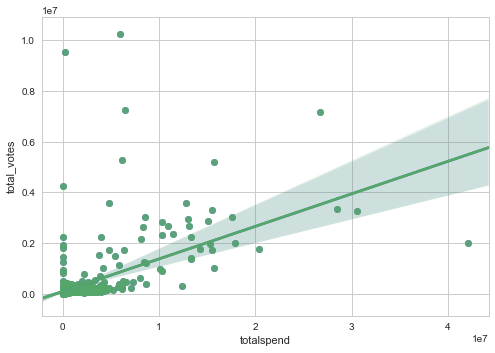

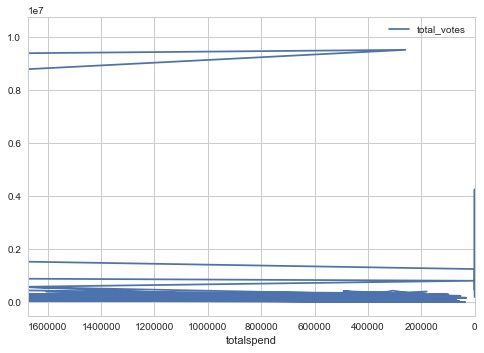

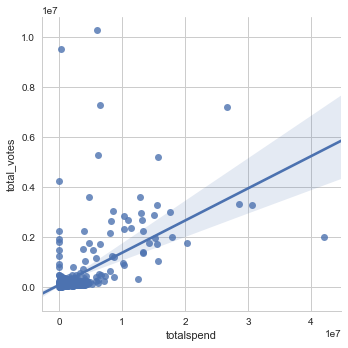

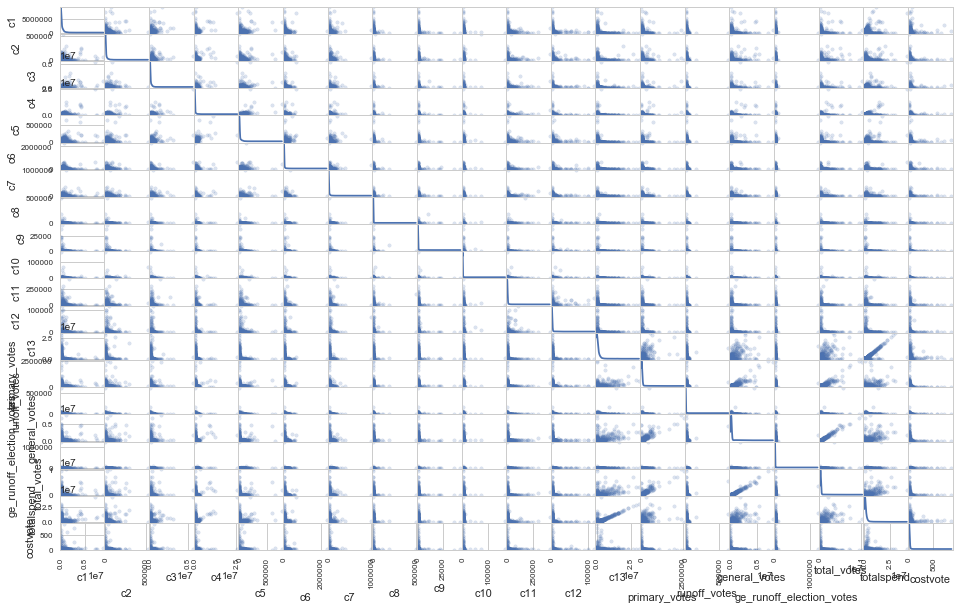

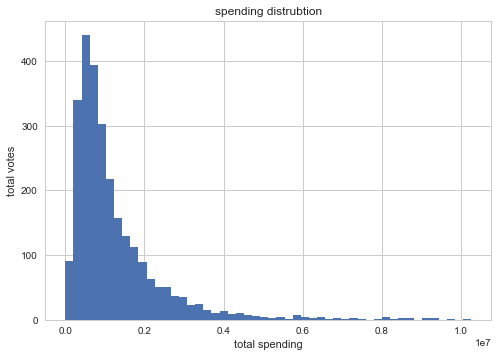

In [589]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(Winner['totalspend'], bins = 50, range = (Winner['total_votes'].min(),Winner['total_votes'].max()))
plt.title('spending distrubtion')
plt.xlabel('total spending')
plt.ylabel('total votes')
plt.show()

# machine learning test

In [592]:

feature_cols = ['c1', 'c2','c3', 'c4','c5','c6','c7','c8','c9','c10','c11','c12','c13']

# use a list to select a subset of the original DataFrame
X = Winner[feature_cols]

# print the first five rows
X.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13
5,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,666262.07
6,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,541474.45
14,54616.04,2343.79,71452.12,547321.04,27000.0,66857.04,9362.66,249.0,0.0,0.0,0.0,0.0,1626.96
15,54178.00,8154.95,121673.90,165131.27,17000.0,16138.18,9083.92,0.0,0.0,0.0,0.0,0.0,2321.95
16,15420.65,8540.32,91996.02,81481.66,15000.0,11833.66,2350.00,0.0,0.0,0.0,0.0,0.0,215.00


In [593]:
print (type(X))
print (X.shape)

<class 'pandas.core.frame.DataFrame'>
(2767, 13)


In [594]:
# now we select a serie Y from the data frame (Y is the target feature)
Y = Winner['total_votes']

## we could have done also Y= data_Frame.car_price

# print the first 5 rows
Y.head(5)

5     180591.0
6     113103.0
14    166855.0
15    254348.0
16    164455.0
Name: total_votes, dtype: float64

In [595]:
print (type(Y))
print (Y.shape)

<class 'pandas.core.series.Series'>
(2767,)


In [596]:
from sklearn.cross_validation import train_test_split
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 1)

In [597]:
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print(Y_test.shape)

(2075, 13)
(692, 13)
(2075,)
(692,)


In [598]:

# we import the model first

from sklearn.linear_model import LinearRegression

# im=ntantiate the model
linreg = LinearRegression()

# fit the model to the training data(Learn the coefficient)
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [599]:
#Linear Regression
print('the Y intercept is :', linreg.intercept_)
print ('the coefficients  are :', linreg.coef_)

the Y intercept is : 108432.456258
the coefficients  are : [ 0.02826586  2.4302622  -0.0042128   0.1349992   0.14604022 -0.35010003
 -0.24690445 -0.26273756  0.45979842 -2.51925491  0.18033728 -0.20918689
  0.11583397]


In [609]:
for idx, feature_cols in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(feature_cols, linreg.coef_[idx]))

The coefficient for c1 is 0.028265862933634592
The coefficient for c2 is 2.430262201763128
The coefficient for c3 is -0.0042127998327381455
The coefficient for c4 is 0.13499920380322716
The coefficient for c5 is 0.14604022167105157
The coefficient for c6 is -0.3501000285254392
The coefficient for c7 is -0.246904451792624
The coefficient for c8 is -0.2627375574384383
The coefficient for c9 is 0.4597984215060087
The coefficient for c10 is -2.519254914451675
The coefficient for c11 is 0.1803372813056261
The coefficient for c12 is -0.20918689348119265
The coefficient for c13 is 0.11583397035594989


In [630]:
X1 = Winner['totalspend']
print (type(X1))
print (X1.shape)

<class 'pandas.core.series.Series'>
(2767,)


In [631]:
Y1 = Winner['total_votes']

## we could have done also Y= data_Frame.car_price

# print the first 5 rows
Y1.head(5)

5     180591.0
6     113103.0
14    166855.0
15    254348.0
16    164455.0
Name: total_votes, dtype: float64

In [632]:
print (type(Y))
print (Y.shape)

<class 'pandas.core.series.Series'>
(2767,)


In [633]:
from sklearn.cross_validation import train_test_split
X1_train, Y1_train, X1_test, Y1_test = train_test_split(X1, Y1,random_state = 1)

In [634]:
from sklearn.metrics import mean_squared_error as mse
expected  = Y1
predicted = model.predict(X1)
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

ValueError: shapes (5442,12) and (2767,) not aligned: 12 (dim 1) != 2767 (dim 0)